# States

In [273]:
# import quantum_simulation_recipe as qsr
# from quantum_simulation_recipe import spin_ham
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
import numpy as np

## Pure states

### Product states

In [272]:
## create a statevector from label such as '11'
product_vec = Statevector.from_label('1'*2) # 0, 1, r, l
print('product_vec: ', product_vec)

product_vec:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


In [269]:
## to_dict
psi = Statevector.from_label('-0')
print(psi.to_dict())

{'00': (0.7071067811865475+0j), '10': (-0.7071067811865475+0j)}


In [270]:
## state to projector operator
print(psi.to_operator())
print(np.outer(psi.data, psi.data.conj()))

Operator([[ 0.5+0.j,  0. +0.j, -0.5-0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. -0.j,  0. +0.j],
          [-0.5+0.j,  0. +0.j,  0.5+0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. -0.j,  0. +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
[[ 0.5+0.j  0. +0.j -0.5-0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]]


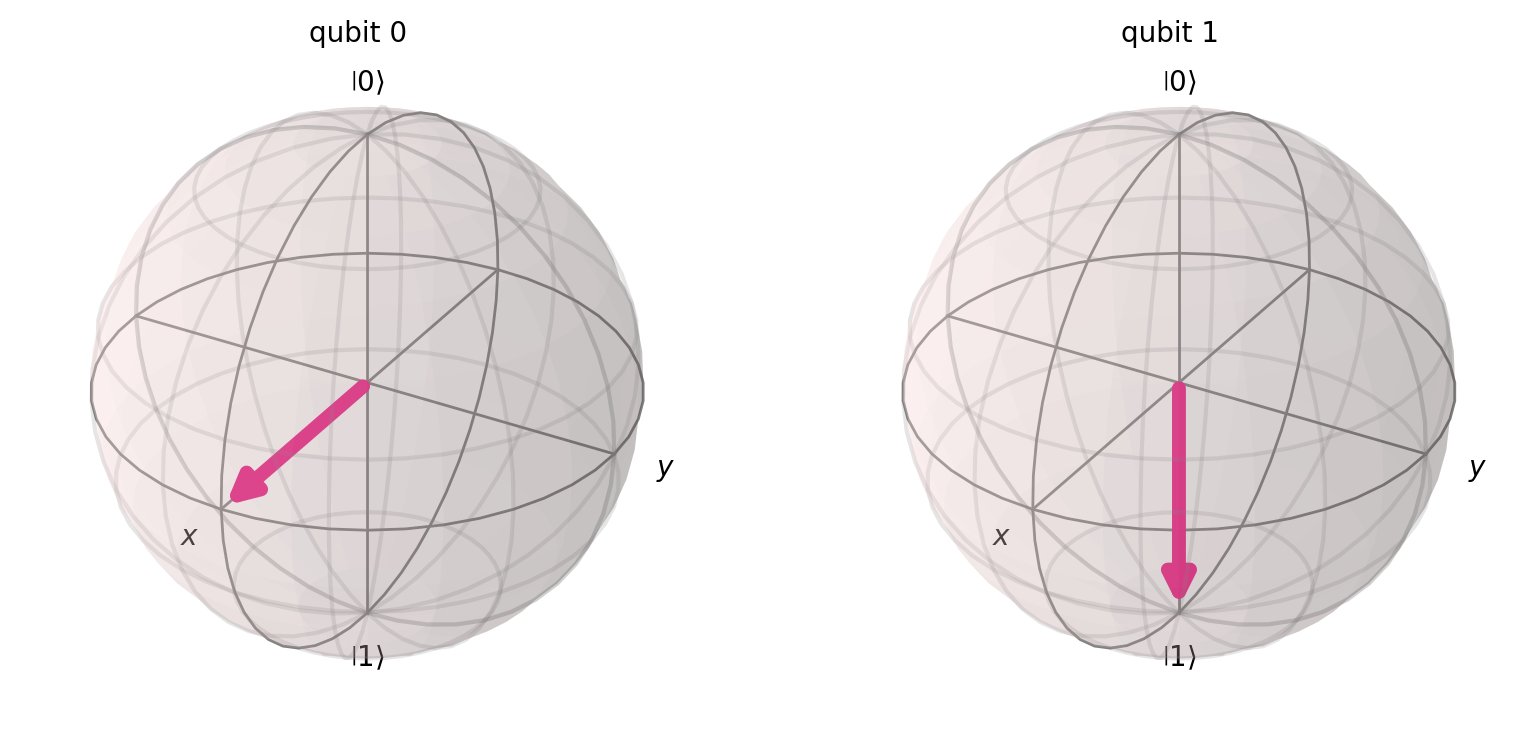

In [274]:
# https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_multivector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector 

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
 
state = Statevector(qc)
plot_bloch_multivector(state)

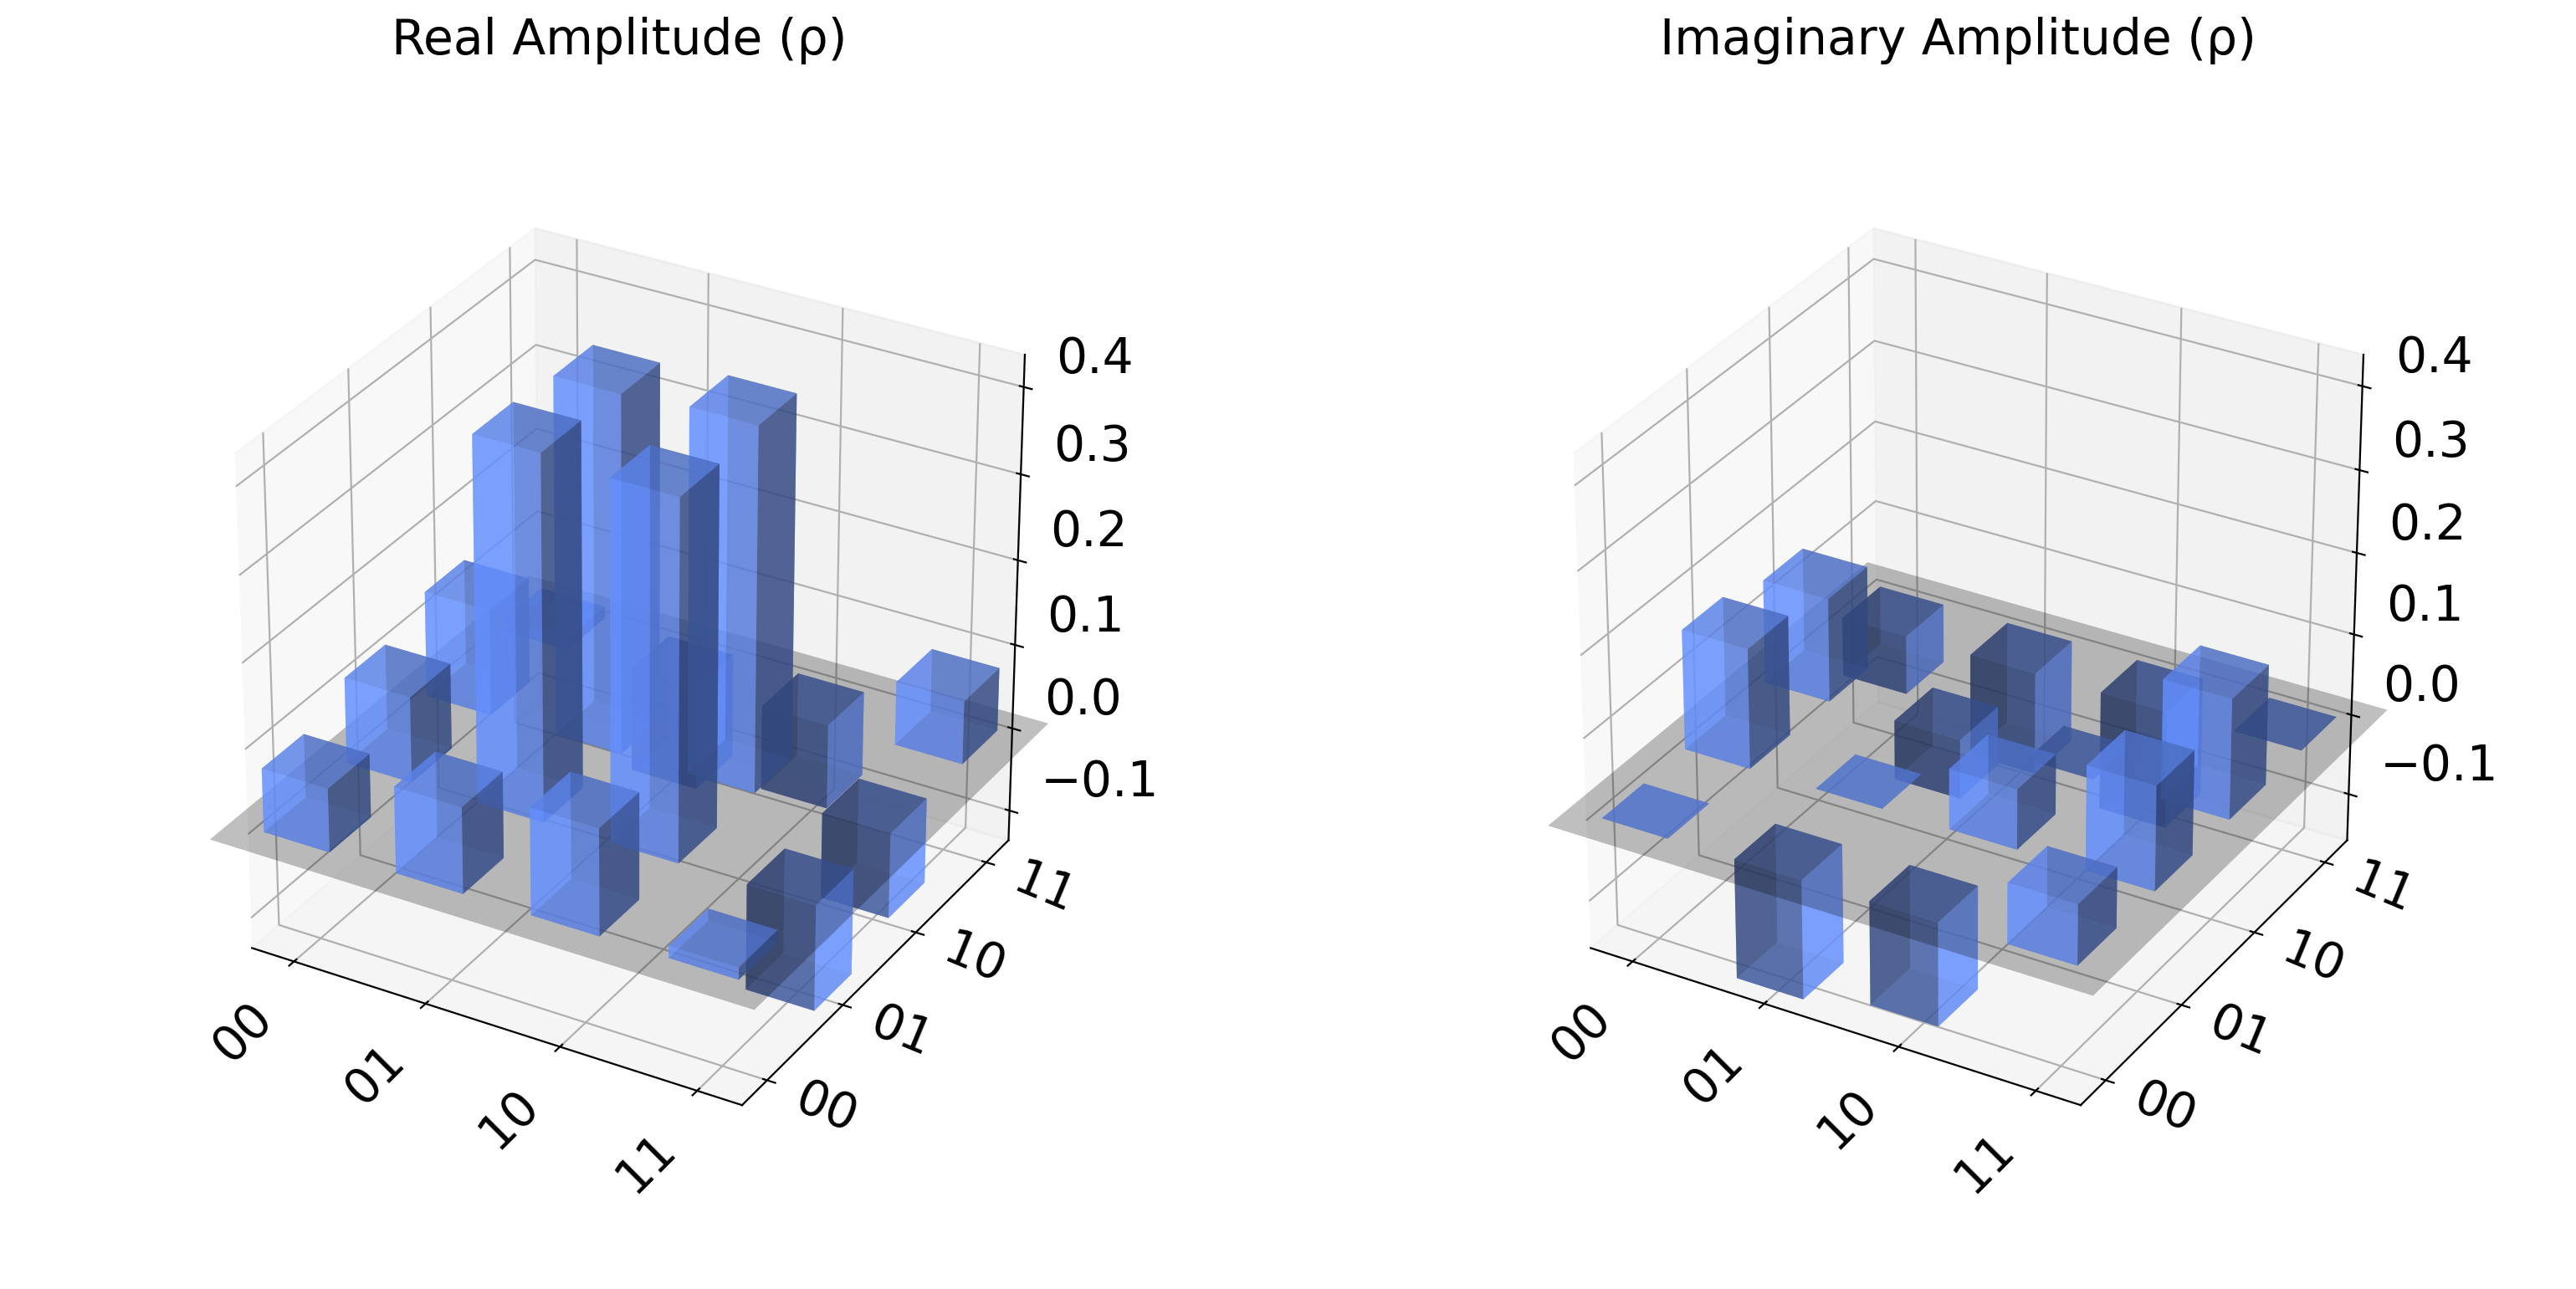

In [276]:
# You can make the bars more transparent to better see the ones that are behind
# if they overlap.
 
import numpy as np
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
  
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
 
state = Statevector(qc)
plot_state_city(state, alpha=0.6)

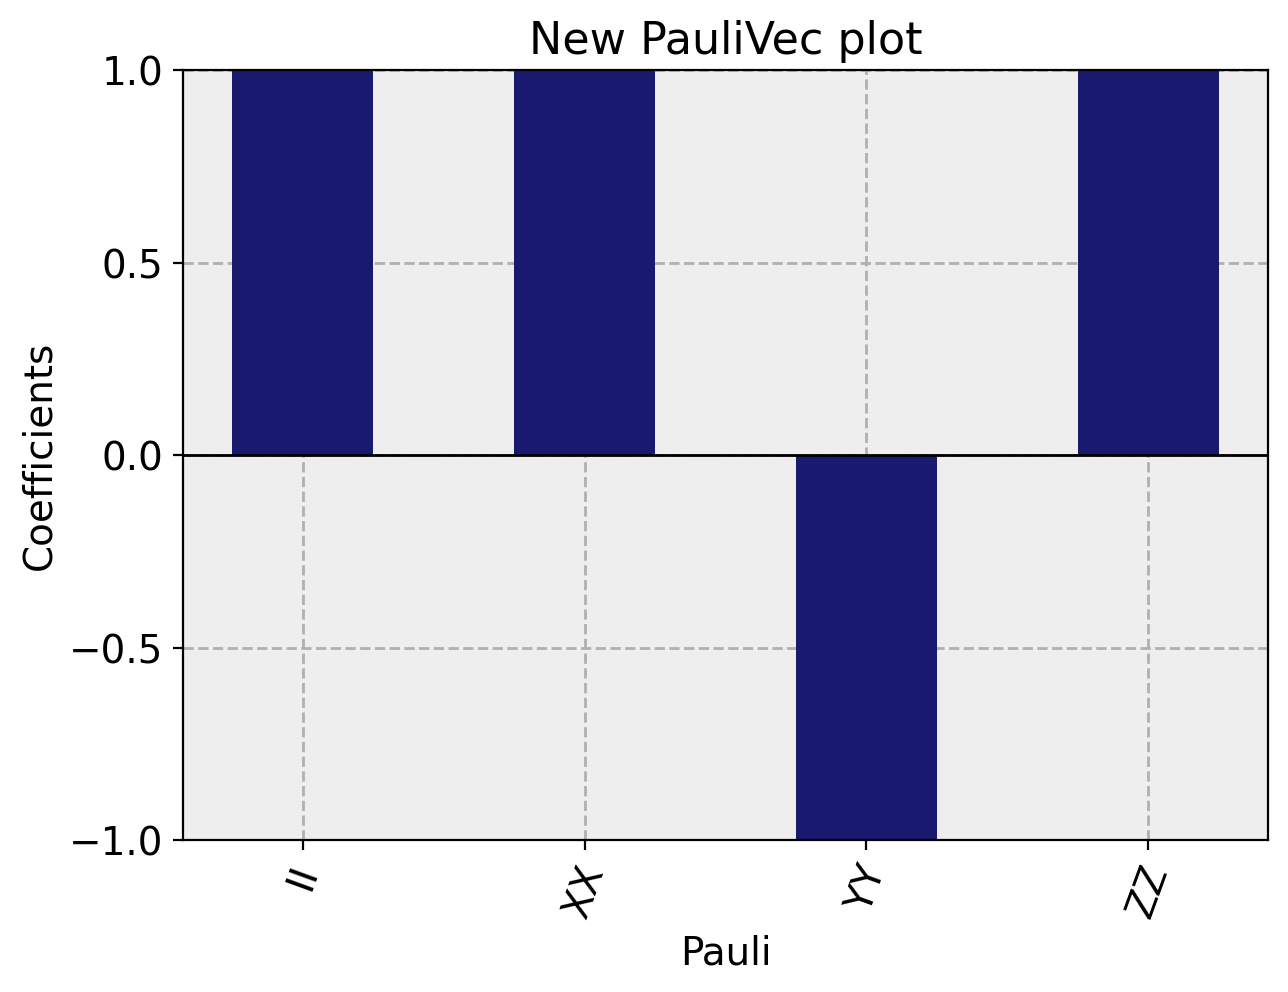

In [277]:
# https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_paulivec
# You can set a color for all the bars.
 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_paulivec
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
 
state = Statevector(qc)
plot_state_paulivec(state, color='midnightblue', title="New PauliVec plot")

### Random states

In [164]:
## Haar random pure state
from qiskit.quantum_info import random_statevector

random_state = random_statevector(2**2)
print(random_state)
print(random_state.data)

Statevector([ 0.11883858+0.28571851j,  0.28018589-0.31746808j,
              0.32283603+0.7564093j , -0.02186317+0.21930817j],
            dims=(2, 2))
[ 0.11883858+0.28571851j  0.28018589-0.31746808j  0.32283603+0.7564093j
 -0.02186317+0.21930817j]


In [163]:
#### 1-design

## Meausre

[-0.38839405+0.02431925j -0.25367028-0.20474389j  0.22912445-0.19375583j
 -0.06034319-0.19424016j -0.01490278-0.45455492j -0.36111652-0.33499947j
  0.39646669-0.01241454j  0.05951946+0.02292395j]
{'000': 10, '001': 11, '010': 8, '011': 7, '100': 16, '101': 33, '110': 15}


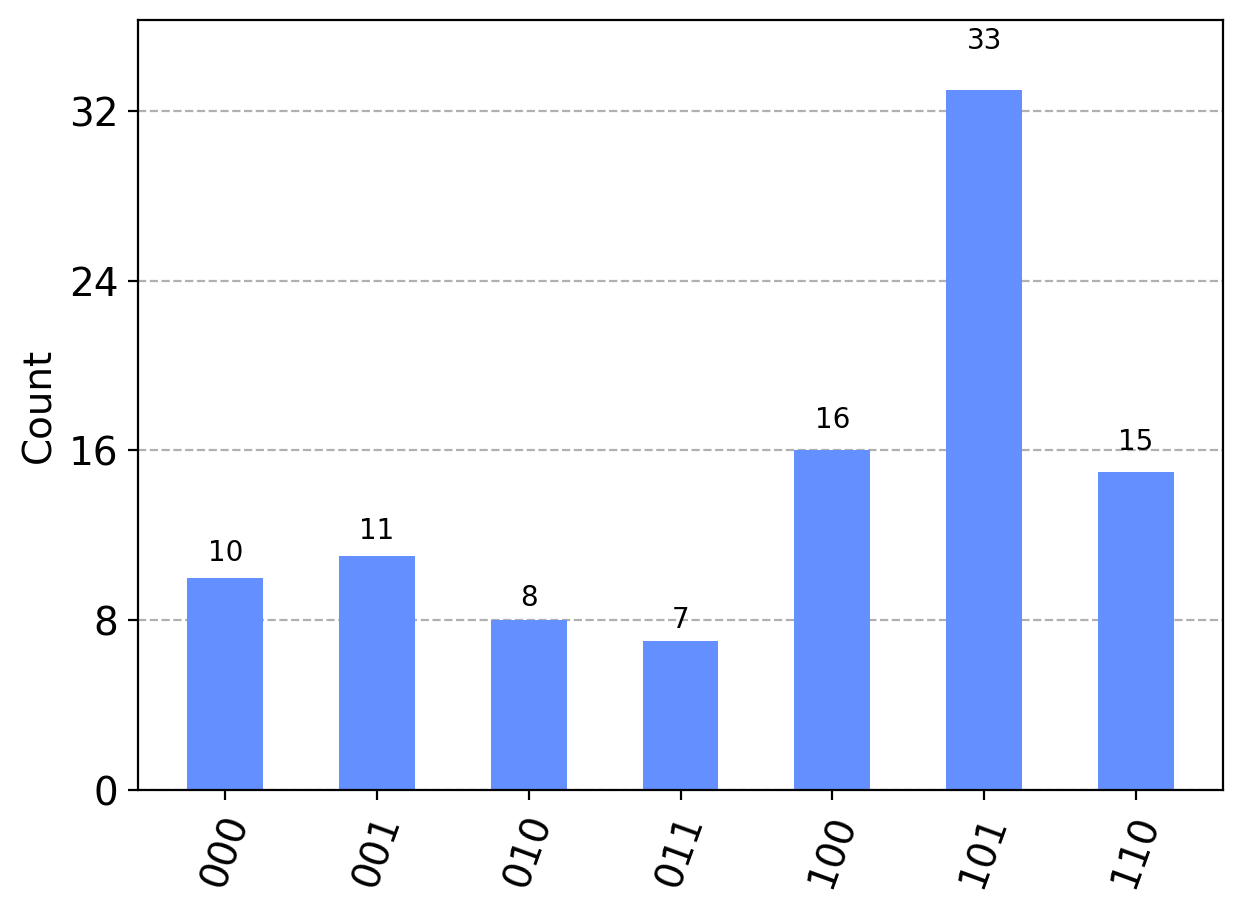

In [261]:
n = 3
random_state = random_statevector([2]*n)
print(random_state.data)
sample_count = random_state.sample_counts(100)
print(sample_count)
# plot histogram of sample count
from qiskit.visualization import plot_histogram
plot_histogram(sample_count)

## Mixed state 

In [153]:
## random densitry matrix
from qiskit.quantum_info import random_density_matrix

random_density_matrix(4)

DensityMatrix([[ 0.54496788-1.03339759e-18j,  0.12792975+1.48022386e-01j,
                -0.09790559-7.79656825e-03j, -0.23076562+3.38692632e-02j],
               [ 0.12792975-1.48022386e-01j,  0.21852742-4.61091820e-19j,
                -0.02891472+4.34432728e-03j, -0.06771913+5.96049968e-02j],
               [-0.09790559+7.79656825e-03j, -0.02891472-4.34432728e-03j,
                 0.07696603+2.00420617e-19j,  0.07215407-4.65205368e-02j],
               [-0.23076562-3.38692632e-02j, -0.06771913-5.96049968e-02j,
                 0.07215407+4.65205368e-02j,  0.15953868+1.29406880e-18j]],
              dims=(2, 2))


### convert a pure state to density matrix

In [154]:
init_state = Statevector.from_label('0'*2)
init_dm = DensityMatrix(init_state).to_operator()
init_dm 

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


## Entangled state

### Bell state

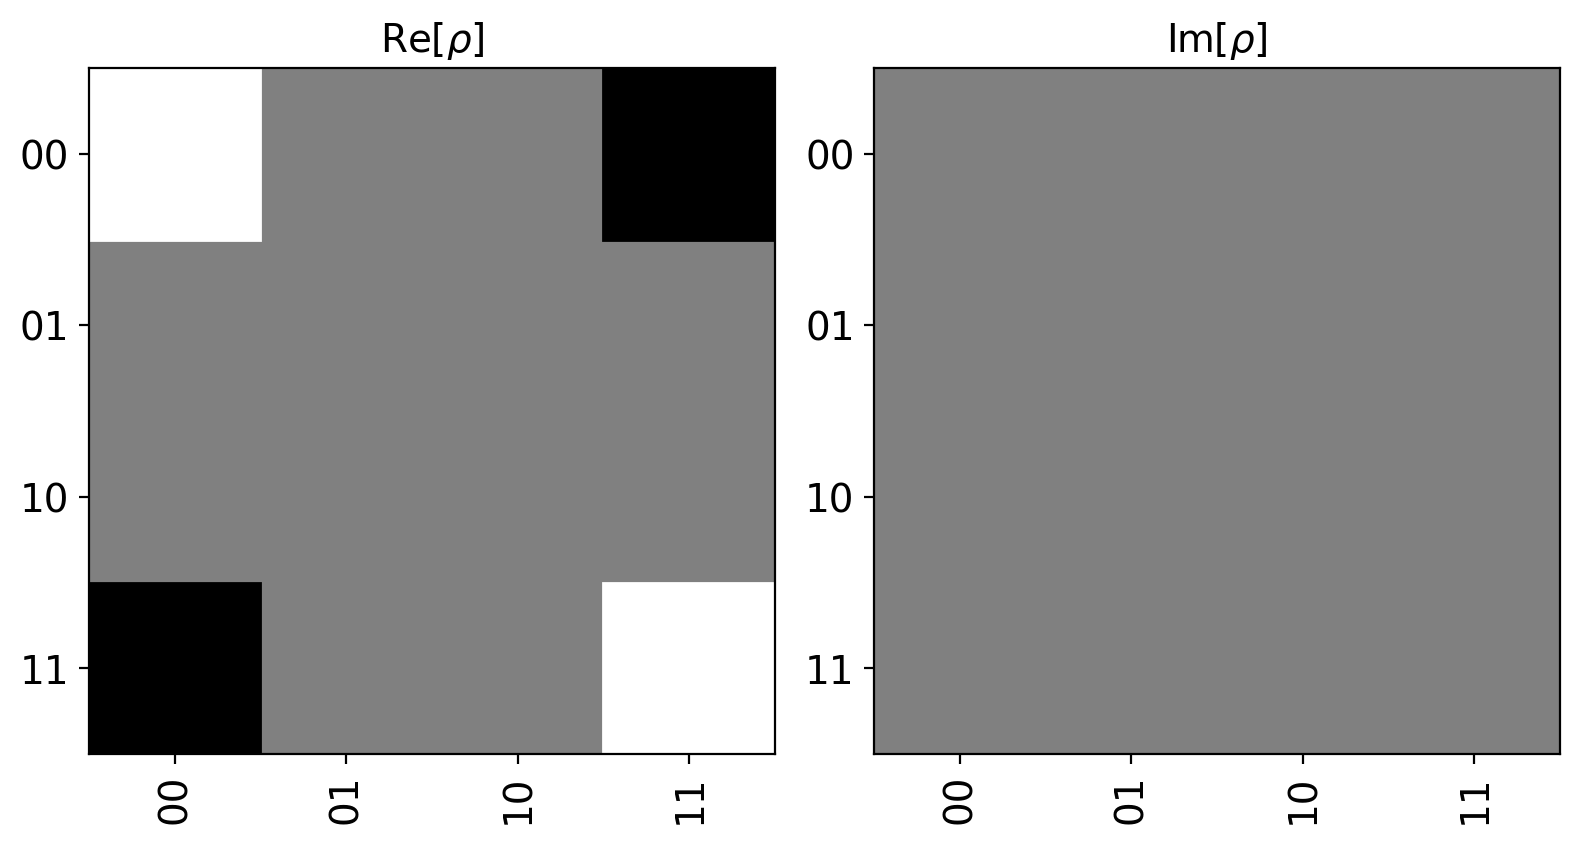

In [157]:

sv = Statevector([1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])
sv.draw(output='hinton')

### GHZ, W states

In [162]:
# GHZ state
ghz_state = Statevector.from_label('0000') + Statevector.from_label('1111')
ghz_state.is_valid()
# normalize

False

## Stabilizer state
https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.StabilizerState#stabilizerstate

In [16]:
from qiskit.quantum_info import StabilizerState
 
stabilizer_list = ["ZXX", "-XYX", "+ZYY"]
stab = StabilizerState.from_stabilizer_list(stabilizer_list)
stab

StabilizerState(['+ZXX', '-XYX', '+ZYY'])